In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [5]:
# linux use this
data = list(csv.reader(open('ObsidianAssemblyStats_new.csv')))

# mac use this
#csvfile = open('ObsidianAssemblyStats.csv', 'Ur')#, newline='')
#data = list(csv.reader(csvfile, delimiter = ','))


In [6]:
print(data[0][:])

['Sample', 'Obsidian1', 'Obsidian2', 'Obsidian3', 'Obsidian 4', 'Obsidian 5', 'Obsidian6', 'ObsidianWater', 'Obsidian 2_superCont', 'Obsidian 3_superCont', 'Obsidian 4_superCont', 'Obsidian 5_superCont', 'Obsidian 6_superCont']


In [40]:
# convert numerical part of the metadata (string) list to a list of floats
#len(data[0])
#print(data[35][0])
#fibonacci = [0,1,1,2,3,5,8,13,21]
for i in range(1,len(data)):
    dataselection = np.asarray(data[i][1:])
    dataselectionnew = list(map(float,dataselection))
    if i == 1:
        dataselectionfin = [dataselectionnew]
    if i > 1:    
        dataselectionfin.append(dataselectionnew)

#len(dataselectionfin)        
#print(dataselectionfin)
dataset = np.array(dataselectionfin)


In [10]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

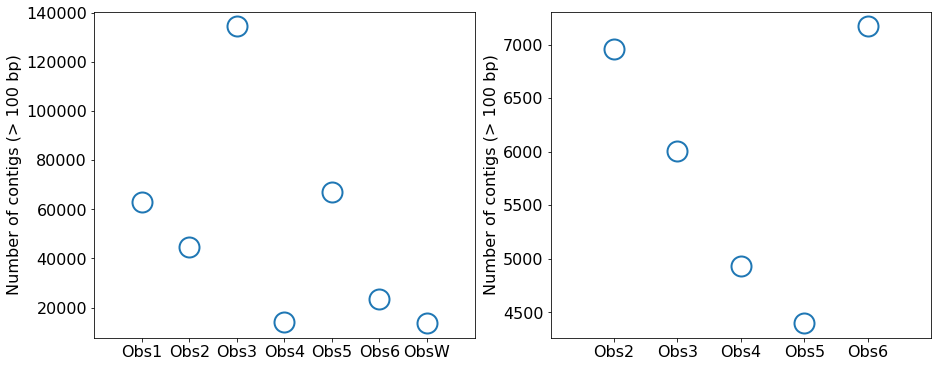

In [26]:
# plot contigs and supercontigs total
f,ax = plt.subplots()

x_value = [0,1,2,3,4,5,6]
plt.subplot(121)
plt.plot(dataset[0][0:7],'o',ms=20,mfc='None',mew=2)
plt.ylabel('Number of contigs (> 100 bp)')
new_ticks = ["Obs1","Obs2","Obs3","Obs4","Obs5","Obs6","ObsW"]
plt.xlim(-1,7)
plt.xticks(x_value,new_ticks)

plt.subplot(122)
plt.plot(dataset[0][7:],'o',ms=20,mfc='None',mew=2)
plt.ylabel('Number of contigs (> 100 bp)')
plt.xlim(-1,5)
plt.xticks(x_value[0:5],new_ticks[1:6])

f.set_figheight(6)
f.set_figwidth(15)
plt.show()

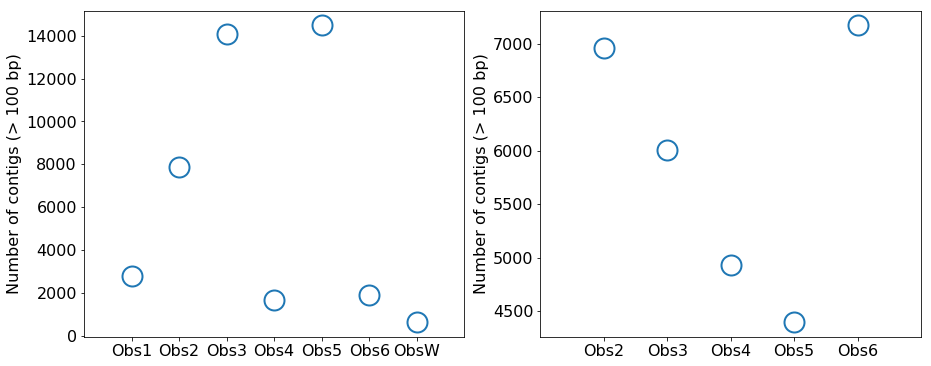

In [27]:
# plot contigs and supercontigs ABOVE 1KB
f,ax = plt.subplots()

x_value = [0,1,2,3,4,5,6]
plt.subplot(121)
plt.plot(dataset[1][0:7],'o',ms=20,mfc='None',mew=2)
plt.ylabel('Number of contigs (> 100 bp)')
new_ticks = ["Obs1","Obs2","Obs3","Obs4","Obs5","Obs6","ObsW"]
plt.xlim(-1,7)
plt.xticks(x_value,new_ticks)

plt.subplot(122)
plt.plot(dataset[1][7:],'o',ms=20,mfc='None',mew=2)
plt.ylabel('Number of contigs (> 100 bp)')
plt.xlim(-1,5)
plt.xticks(x_value[0:5],new_ticks[1:6])

f.set_figheight(6)
f.set_figwidth(15)
plt.show()

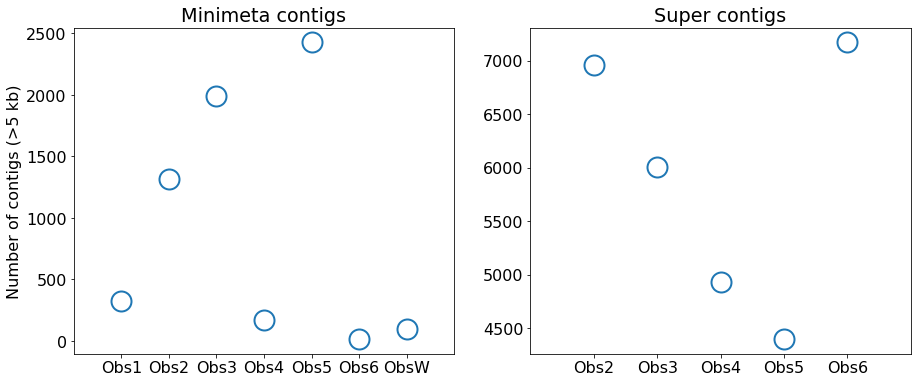

In [34]:
# plot contigs and supercontigs ABOVE 5KB
f,ax = plt.subplots()

x_value = [0,1,2,3,4,5,6]
plt.subplot(121)
plt.plot(dataset[2][0:7],'o',ms=20,mfc='None',mew=2)
plt.ylabel('Number of contigs (>5 kb)')
new_ticks = ["Obs1","Obs2","Obs3","Obs4","Obs5","Obs6","ObsW"]
plt.xlim(-1,7)
plt.xticks(x_value,new_ticks)
plt.title('Minimeta contigs')

plt.subplot(122)
plt.plot(dataset[2][7:],'o',ms=20,mfc='None',mew=2)
#plt.ylabel('Number of contigs (> 100 bp)')
plt.xlim(-1,5)
plt.xticks(x_value[0:5],new_ticks[1:6])
plt.title('Super contigs')

f.set_figheight(6)
f.set_figwidth(15)
plt.show()


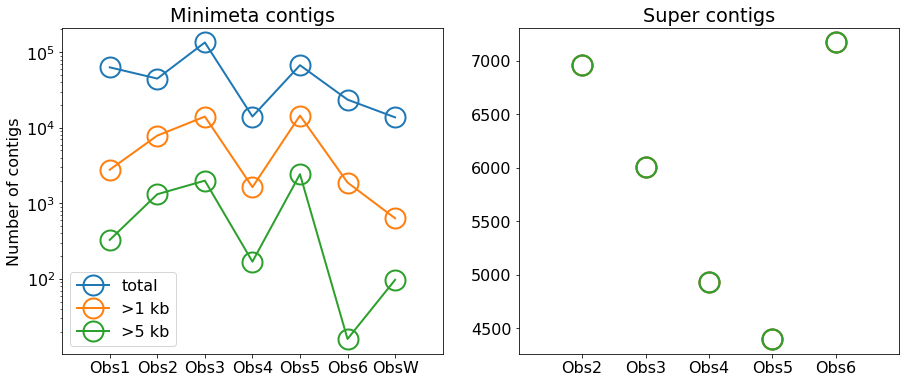

In [48]:
# plot contigs and supercontigs ABOVE 5KB
f,ax = plt.subplots()

x_value = [0,1,2,3,4,5,6]
plt.subplot(121)
plt.plot(dataset[0][0:7],'-o',ms=20,mfc='None',mew=2)
plt.plot(dataset[1][0:7],'-o',ms=20,mfc='None',mew=2)
plt.semilogy(dataset[2][0:7],'-o',ms=20,mfc='None',mew=2)
new_ticks = ["Obs1","Obs2","Obs3","Obs4","Obs5","Obs6","ObsW"]
plt.xlim(-1,7)
plt.legend(['total','>1 kb','>5 kb'])
plt.xticks(x_value,new_ticks)
plt.title('Minimeta contigs')
plt.ylabel('Number of contigs')

plt.subplot(122)
plt.plot(dataset[0][7:],'o',ms=20,mfc='None',mew=2)
plt.plot(dataset[1][7:],'o',ms=20,mfc='None',mew=2)
plt.plot(dataset[2][7:],'o',ms=20,mfc='None',mew=2)

plt.xlim(-1,5)
plt.title('Super contigs')

plt.xticks(x_value[0:5],new_ticks[1:6])

f.set_figheight(6)
f.set_figwidth(15)
plt.show()


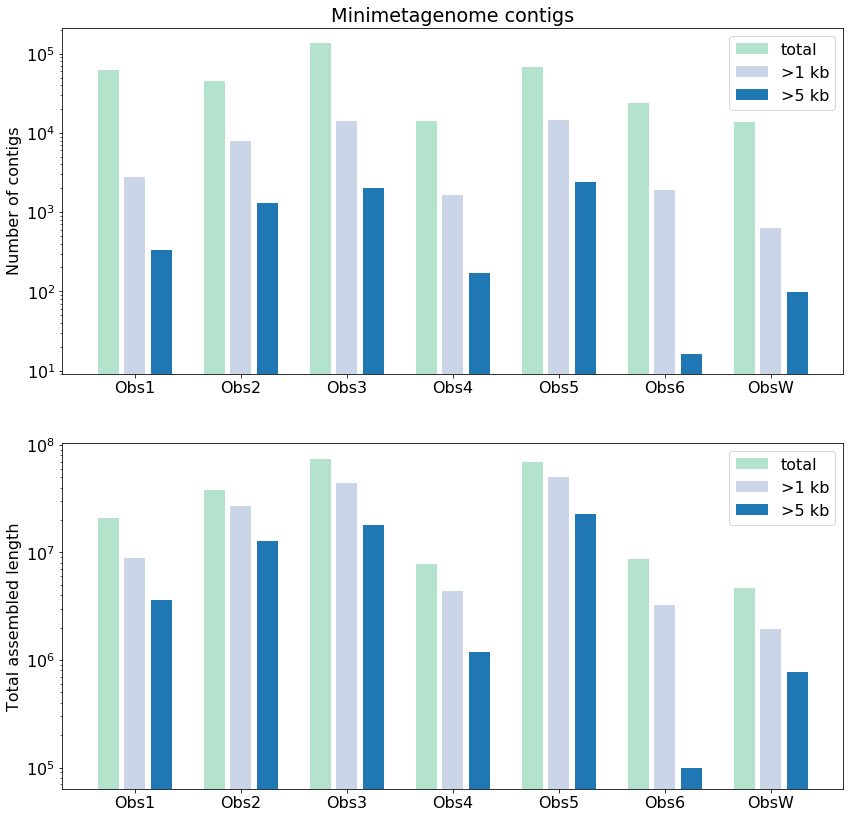

In [153]:
# plot absolute as bar graph with log scale
#plt.figure(figsize=(14,7))
f, ax =plt.subplots()

colors = np.r_[np.linspace(0.1, 1, 5), np.linspace(0.1, 1, 5)] 
mymap = plt.get_cmap("Pastel2")
my_colors = mymap(colors)

plt.subplot(211)
x_value=np.asarray([0,1,2,3,4,5,6])
width = 0.25
#ax.set_axisbelow(True)
plt.rc('grid', linestyle="dashed", color='grey')
#plt.grid()
plt.bar(x_value-width,dataset[0,0:7],0.8*width,log=True,color=my_colors[0])
plt.bar(x_value,dataset[1,0:7],0.8*width,color=my_colors[1])
plt.bar(x_value+width,dataset[2,0:7],0.8*width)#,color=my_colors[2])
plt.xticks(x_value,new_ticks)
plt.ylabel('Number of contigs')
plt.legend(['total','>1 kb','>5 kb'])
plt.title('Minimetagenome contigs')

plt.subplot(212)
#ax.set_axisbelow(True)
plt.rc('grid', linestyle="dashed", color='grey')
#plt.grid()
plt.bar(x_value-width,dataset[6,0:7],0.8*width,log=True,color=my_colors[0])
plt.bar(x_value,dataset[7,0:7],0.8*width,color=my_colors[1])
plt.bar(x_value+width,dataset[8,0:7],0.8*width)#,color=my_colors[2])
plt.xticks(x_value,new_ticks)
plt.ylabel('Total assembled length')
plt.legend(['total','>1 kb','>5 kb'])
#plt.title('Minimetagenome contigs')

ax.xaxis.grid(True, zorder=0)
ax.yaxis.grid(True, zorder=0)

f.set_figheight(14)
f.set_figwidth(14)
plt.show()

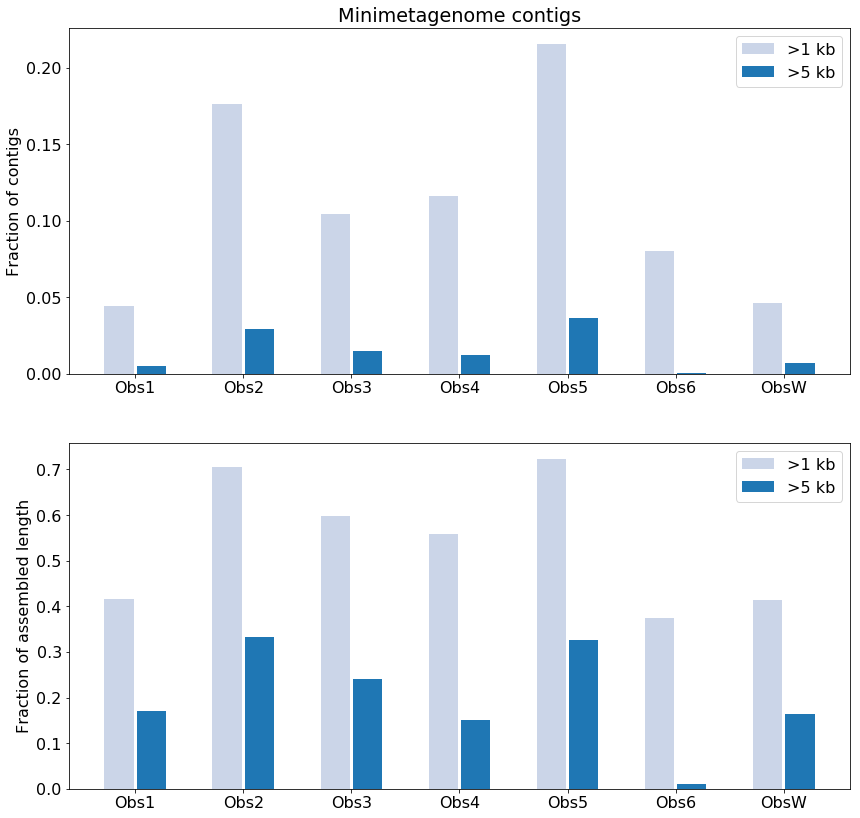

In [161]:
# plot fraction as bar graph with log scale
#plt.figure(figsize=(14,7))
f, ax =plt.subplots()

colors = np.r_[np.linspace(0.1, 1, 5), np.linspace(0.1, 1, 5)] 
mymap = plt.get_cmap("Pastel2")
my_colors = mymap(colors)

plt.subplot(211)
x_value=np.asarray([0,1,2,3,4,5,6])
width = 0.15
#ax.set_axisbelow(True)
plt.rc('grid', linestyle="dashed", color='grey')
#plt.grid()
#plt.bar(x_value-width,dataset[0,0:7],0.8*width,log=True,color=my_colors[0])
plt.bar(x_value-width,dataset[1,0:7]/dataset[0,0:7],1.8*width,color=my_colors[1])
plt.bar(x_value+width,dataset[2,0:7]/dataset[0,0:7],1.8*width)#,color=my_colors[2])
plt.xticks(x_value,new_ticks)
plt.ylabel('Fraction of contigs')
plt.legend(['>1 kb','>5 kb'])
plt.title('Minimetagenome contigs')

plt.subplot(212)
#ax.set_axisbelow(True)
plt.rc('grid', linestyle="dashed", color='grey')
#plt.grid()
#plt.bar(x_value-width,dataset[6,0:7],0.8*width,log=True,color=my_colors[0])
plt.bar(x_value-width,dataset[7,0:7]/dataset[6,0:7],1.8*width,color=my_colors[1])
plt.bar(x_value+width,dataset[8,0:7]/dataset[6,0:7],1.8*width)#,color=my_colors[2])
plt.xticks(x_value,new_ticks)
plt.ylabel('Fraction of assembled length')
plt.legend(['>1 kb','>5 kb'])
#plt.title('Minimetagenome contigs')

ax.xaxis.grid(True, zorder=0)
ax.yaxis.grid(True, zorder=0)

f.set_figheight(14)
f.set_figwidth(14)
plt.show()

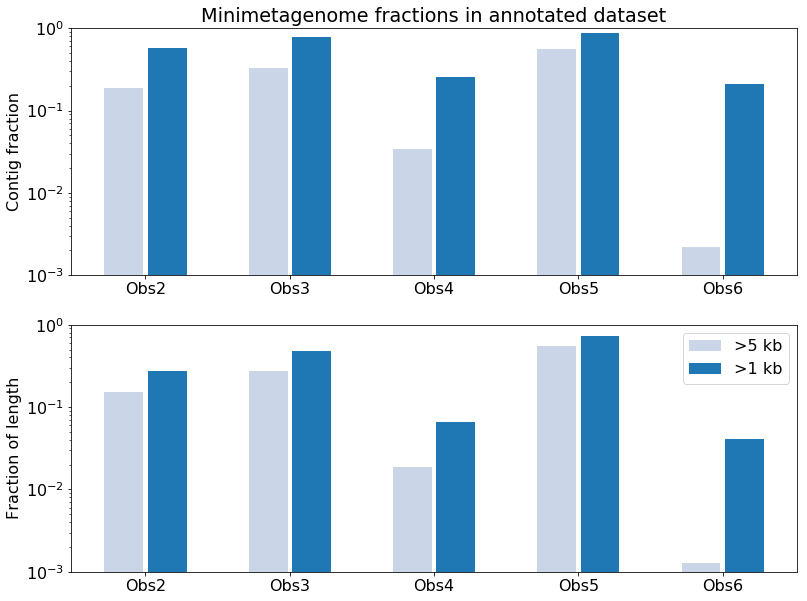

In [130]:
# fraction of the superContigs that is from minimeta
f,ax =plt.subplots()
# plot absolute as bar graph with log scale
#plt.figure(figsize=(9,6))

plt.subplot(211)
x_value=np.asarray([0,1,2,3,4,5,6])
width = 0.15
plt.bar(x_value[1:6]-width,dataset[2,1:6]/dataset[2,7:],1.8*width,log=True,color=my_colors[1])
plt.bar(x_value[1:6]+width,dataset[1,1:6]/(dataset[2,7:]-dataset[2,1:6]+dataset[1,1:6]),1.8*width,log=True)#,color=my_colors[2])
plt.xticks(x_value[1:6],new_ticks[1:6])
plt.ylabel('Contig fraction')
#plt.legend(['total','>1 kb','>5 kb'])
plt.title('Minimetagenome fractions in annotated dataset')
plt.ylim(1e-3,1)

plt.subplot(212)
#plt.bar(x_value[1:6],dataset[8,1:6]/dataset[6,7:],log=True,color=my_colors[1])
plt.bar(x_value[1:6]-width,dataset[8,1:6]/dataset[6,7:],1.8*width,log=True,color=my_colors[1])
plt.bar(x_value[1:6]+width,dataset[7,1:6]/(dataset[6,7:]-dataset[8,1:6]+dataset[7,1:6]),1.8*width,log=True)#,color=my_colors[2])
plt.xticks(x_value[1:6],new_ticks[1:6])
plt.ylabel('Fraction of length')
plt.legend(['>5 kb','>1 kb'])
#plt.title('Minimetagenome fractions in annotated dataset')

plt.ylim(1e-3,1)

f.set_figwidth(13)
f.set_figheight(10)
plt.show()

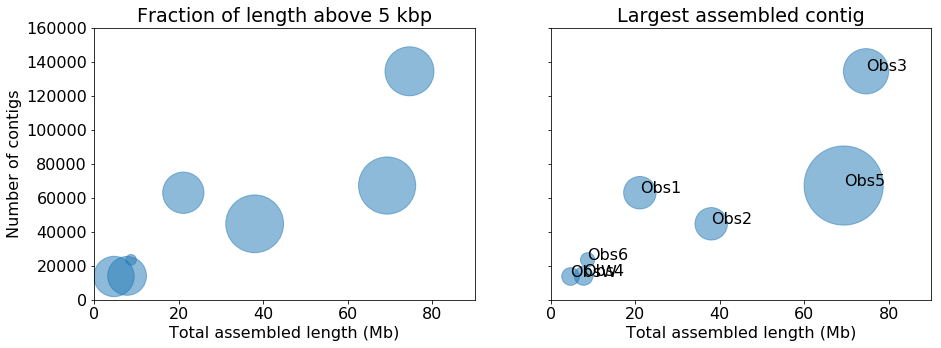

In [162]:
# bubble plot, bubble size corresponds with fraction of assembled length > 5kb
f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,sharey=True)

#plt.subplot(121)
ax1.scatter(dataset[6,0:7]/1e6,dataset[0,0:7],s=(dataset[8,0:7]/dataset[6,0:7])*10000, alpha=.5)
ax1.set_xlabel('Total assembled length (Mb)')
ax1.set_ylabel('Number of contigs')
ax1.set_title('Fraction of length above 5 kbp')
ax1.set_xlim(0,90)
ax1.set_ylim(0,1.6e5)

 
#plt.subplot(122)
x = dataset[6,0:7]/1e6
y = dataset[0,0:7]
ax2.scatter(x,y,s=(dataset[13,0:7]/.5e2), alpha=.5)# this is the row representing the largest assembled contig
ax2.set_xlabel('Total assembled length (Mb)')
ax2.set_ylim(0,1.6e5)
ax2.set_title('Largest assembled contig')
ax2.set_xlim(0,90)

# label markers in subplot 2
for i, txt in enumerate(new_ticks):
    ax2.annotate(txt, (x[i],y[i]))

f.set_figwidth(15)
f.set_figheight(5)
plt.show()

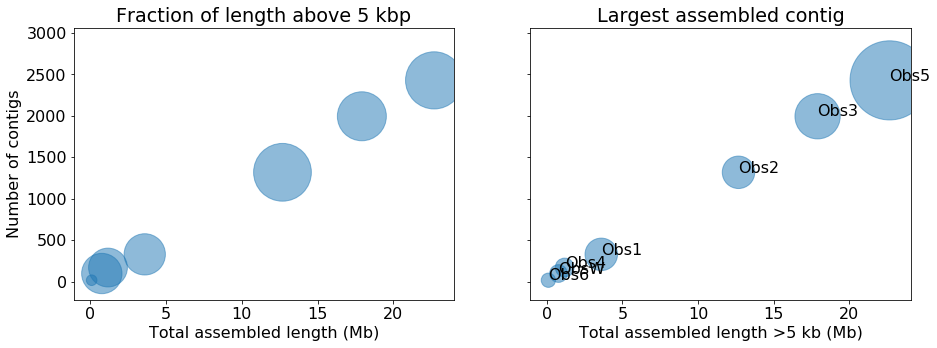

In [164]:
# minimeta contigs vs minimeta length
# bubble plot, bubble size corresponds with fraction of assembled length > 5kb
# this time with the actual annotated data
f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,sharey=True)

#plt.subplot(121)
ax1.scatter(dataset[8,0:7]/1e6,dataset[2,0:7],s=(dataset[8,0:7]/dataset[6,0:7])*10000, alpha=.5)
ax1.set_xlabel('Total assembled length (Mb)')
ax1.set_ylabel('Number of contigs')
ax1.set_title('Fraction of length above 5 kbp')
#ax1.set_xlim(0,90)
#ax1.set_ylim(0,1.6e5)

 
#plt.subplot(122)
x = dataset[8,0:7]/1e6
y = dataset[2,0:7]
ax2.scatter(x,y,s=(dataset[13,0:7]/.5e2), alpha=.5)# this is the row representing the largest assembled contig
ax2.set_xlabel('Total assembled length >5 kb (Mb)')
#ax2.set_ylim(0,1.6e5)
ax2.set_title('Largest assembled contig')
#ax2.set_xlim(0,90)

# label markers in subplot 2
for i, txt in enumerate(new_ticks):
    ax2.annotate(txt, (x[i],y[i]))

f.set_figwidth(15)
f.set_figheight(5)
plt.show()